In [13]:
import numpy as np
import matplotlib.pyplot as plt



In [14]:
def init_cell(cell_id, born_time, expected_division_time, is_alive):
    """
    id: index
    t: born time
    division time: time take to divise
    is_alive: bool
    """
    return [cell_id, born_time, expected_division_time, is_alive]

In [15]:
def time_independent_sample():
    x = np.random.gamma(2,2)
    return x


def time_independent_divise(cell_list, cell_id):
    target_cell = cell_list[cell_id]
    # 1. disactive cell with cell id
    target_cell[3] = False
    # 2. add two new cells
    N = len(cell_list)
    new_cell1 = init_cell(N, target_cell[2], target_cell[2]+time_independent_sample(), True)
    new_cell2 = init_cell(N+1, target_cell[2], target_cell[2]+time_independent_sample(), True)
    cell_list.append(new_cell1)
    cell_list.append(new_cell2)

In [16]:
def find_next_divise_cell(cell_list):
    minimal = np.inf
    cell_id = -1
    for cell in cell_list:
        if cell[3] == True:
            if cell[2]<=minimal:
                minimal = cell[2]
                cell_id = cell[0]
    return cell_id

In [17]:
def time_independent_run(cell_list):
    next_divise_cell_id = find_next_divise_cell(cell_list)
    time_independent_divise(cell_list, next_divise_cell_id)
    return cell_list

In [28]:
def time_independent_main():
    cell_list = []
    first_cell = init_cell(0, 0, time_independent_sample(), True)
    cell_list.append(first_cell)
    
    for _ in range(600):
        if _ < 5:
            print(cell_list)
        time_independent_run(cell_list)
    
    return cell_list


In [29]:
time_independent_results = time_independent_main()

[[0, 0, 1.3859074890620655, True]]
[[0, 0, 1.3859074890620655, False], [1, 1.3859074890620655, 5.821241318387846, True], [2, 1.3859074890620655, 7.519888872778868, True]]
[[0, 0, 1.3859074890620655, False], [1, 1.3859074890620655, 5.821241318387846, False], [2, 1.3859074890620655, 7.519888872778868, True], [3, 5.821241318387846, 9.573005317435321, True], [4, 5.821241318387846, 8.786380047573376, True]]
[[0, 0, 1.3859074890620655, False], [1, 1.3859074890620655, 5.821241318387846, False], [2, 1.3859074890620655, 7.519888872778868, False], [3, 5.821241318387846, 9.573005317435321, True], [4, 5.821241318387846, 8.786380047573376, True], [5, 7.519888872778868, 14.34218150795586, True], [6, 7.519888872778868, 8.681360070933826, True]]
[[0, 0, 1.3859074890620655, False], [1, 1.3859074890620655, 5.821241318387846, False], [2, 1.3859074890620655, 7.519888872778868, False], [3, 5.821241318387846, 9.573005317435321, True], [4, 5.821241318387846, 8.786380047573376, True], [5, 7.519888872778868, 1

In [22]:
time_independent_all_division_time = np.sort(np.array(time_independent_results)[:,2])
time_independent_all_division_time


array([ 4.07225614,  5.4695179 ,  7.05039553, ..., 44.99749043,
       45.40372636, 49.11687622])

Text(0, 0.5, 'time for the n-th devision, time t')

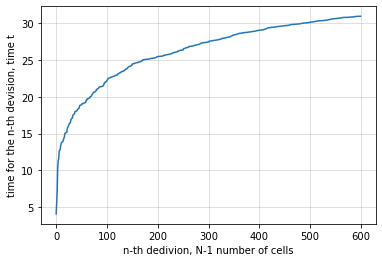

In [23]:
plt.plot(time_independent_all_division_time[:600])
plt.grid(alpha=0.5)
plt.xlabel("n-th dedivion, N-1 number of cells")
plt.ylabel("time for the n-th devision, time t")
#the n-th devision will provides n+1 cells, therefore N(t)=n-th devision+1, i.e N-1=n-th devision
#time for the n-th devision is actually the random time ,
#for example if we are looking at random time T,we just need to consider corresponding right closest integer in x-axis 

Text(0, 0.5, 'time ')

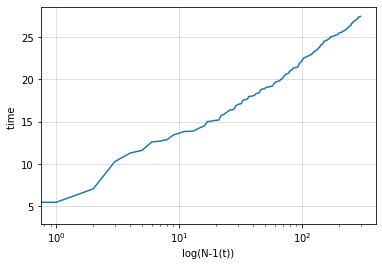

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(time_independent_all_division_time[:300])
ax.grid(alpha=0.5)
ax.set_xscale('log')
plt.xlabel("log(N-1(t))")
plt.ylabel("time ") 

<Figure size 1152x648 with 0 Axes>

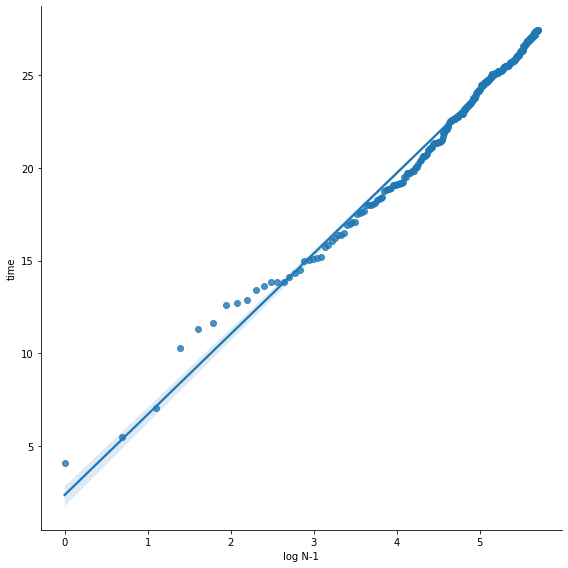

In [26]:
import pandas as pd
import seaborn as sns
num = 300
conn = {"log N-1": np.log(np.arange(num)+1), "time": time_independent_all_division_time[:num]}
con = pd.DataFrame(conn)
plt.figure(figsize=(16,9))
ax = sns.lmplot(x="log N-1", y="time", data = con, height = 8)

In [27]:
from sklearn.linear_model import LinearRegression

xdata= conn["log N-1"].reshape(-1,1)
ydata = conn["time"]

regr = LinearRegression()
regr.fit(xdata, ydata)
print(regr.coef_)
#log(N-1(t)=t/k -b/k ,where k=reg.coef_)

[4.33688992]


In [ ]:
# for time dependent cases :

In [46]:
def time_dependent_sample(born_time):
    def gamma(a,b):
        return 5*np.sin(a+b)+5
    
    gamma_max = 10
    tau_star = 0
    
    while True:
        u1 = np.random.uniform(0,1)
        tau_star -= np.log(u1)/gamma_max
        u2 = np.random.uniform(0,1)
        if u2 <= gamma(tau_star, born_time+tau_star)/gamma_max:
            break
            
    return tau_star

def time_dependent_divise(cell_list, cell_id):
    target_cell = cell_list[cell_id]
    # 1. disactive cell with cell id
    target_cell[3] = False
    # 2. add two new cells
    N = len(cell_list)
    new_cell1 = init_cell(N, target_cell[2], target_cell[2]+time_dependent_sample(target_cell[2]), True)
    new_cell2 = init_cell(N+1, target_cell[2], target_cell[2]+time_dependent_sample(target_cell[2]), True)
    cell_list.append(new_cell1)
    cell_list.append(new_cell2)

In [47]:
def time_dependent_run(cell_list):
    next_divise_cell_id = find_next_divise_cell(cell_list)
    time_dependent_divise(cell_list, next_divise_cell_id)
    return cell_list

def time_dependent_main():
    cell_list = []
    first_cell = init_cell(0, 0, time_dependent_sample(0), True)
    cell_list.append(first_cell)
    
    for _ in range(600):
        if _ < 5:
            print(cell_list)
        time_dependent_run(cell_list)
    
    return cell_list

In [48]:
time_dependent_results = time_dependent_main()
time_dependent_all_division_time = np.sort(np.array(time_dependent_results)[:,2])
time_dependent_all_division_time



[[0, 0, 0.004593757385802449, True]]
[[0, 0, 0.004593757385802449, False], [1, 0.004593757385802449, 0.15881349358699906, True], [2, 0.004593757385802449, 0.20946396946317453, True]]
[[0, 0, 0.004593757385802449, False], [1, 0.004593757385802449, 0.15881349358699906, False], [2, 0.004593757385802449, 0.20946396946317453, True], [3, 0.15881349358699906, 0.3026031687287921, True], [4, 0.15881349358699906, 0.26137660973789784, True]]
[[0, 0, 0.004593757385802449, False], [1, 0.004593757385802449, 0.15881349358699906, False], [2, 0.004593757385802449, 0.20946396946317453, False], [3, 0.15881349358699906, 0.3026031687287921, True], [4, 0.15881349358699906, 0.26137660973789784, True], [5, 0.20946396946317453, 0.2296966410067578, True], [6, 0.20946396946317453, 0.280865489170657, True]]
[[0, 0, 0.004593757385802449, False], [1, 0.004593757385802449, 0.15881349358699906, False], [2, 0.004593757385802449, 0.20946396946317453, False], [3, 0.15881349358699906, 0.3026031687287921, True], [4, 0.158

array([0.00459376, 0.15881349, 0.20946397, ..., 1.38226846, 1.38254819,
       1.40233943])

Text(0, 0.5, 'time for the n-th devision, time t')

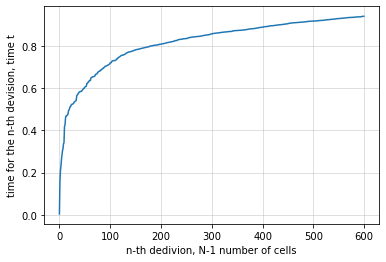

In [49]:
plt.plot(time_dependent_all_division_time[:600])
plt.grid(alpha=0.5)
plt.xlabel("n-th dedivion, N-1 number of cells")
plt.ylabel("time for the n-th devision, time t")
#the n-th devision will provides n+1 cells, therefore N(t)=n-th devision+1, i.e N-1=n-th devision
#time for the n-th devision is actually the random time ,
#for example if we are looking at random time T,we just need to consider corresponding right closest integer in x-axis 

Text(0, 0.5, 'time ')

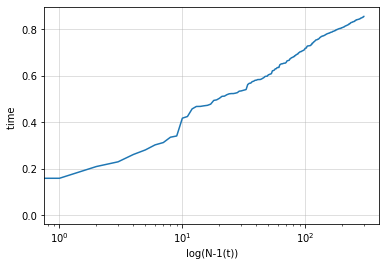

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(time_dependent_all_division_time[:300])
ax.grid(alpha=0.5)
ax.set_xscale('log')
plt.xlabel("log(N-1(t))")
plt.ylabel("time ") 

<Figure size 1152x648 with 0 Axes>

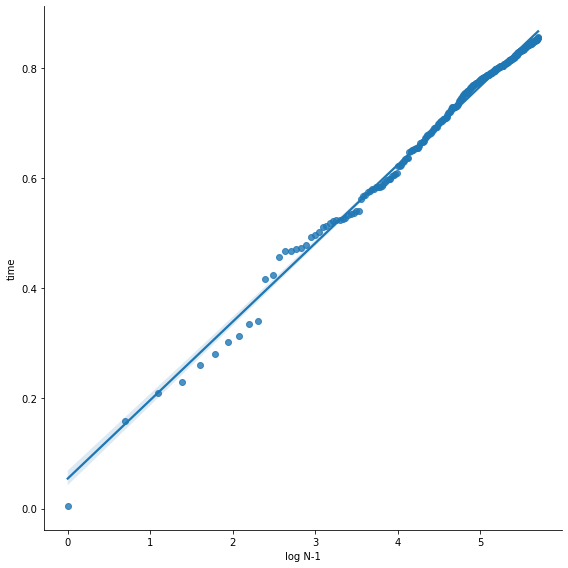

In [51]:
import pandas as pd
import seaborn as sns
num = 300
conn = {"log N-1": np.log(np.arange(num)+1), "time": time_dependent_all_division_time[:num]}
con = pd.DataFrame(conn)
plt.figure(figsize=(16,9))
ax = sns.lmplot(x="log N-1", y="time", data = con, height = 8)
plt.grid(alpha=0.5)

In [52]:
from sklearn.linear_model import LinearRegression

xdata= conn["log N-1"].reshape(-1,1)
ydata = conn["time"]

regr = LinearRegression()
regr.fit(xdata, ydata)
print(regr.coef_)
#log(N-1(t)=t/k -b/k ,where k=reg.coef_)

[0.14236243]


In [53]:
regr.intercept_

0.05445014427343464